<a href="https://colab.research.google.com/github/jjomathew98/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Packages

In [1]:
import pandas as pd
import re
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install ucimlrepo

#Loading dataset

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
liver_disorders = fetch_ucirepo(id=60)

# data (as pandas dataframes)
df = liver_disorders.data.features
df

,mcv,alkphos,sgpt,sgot,gammagt
0,85,92,45,27,31
1,85,64,59,32,23
2,86,54,33,16,54
3,91,78,34,24,36
4,87,70,12,28,10
...,...,...,...,...,...
340,99,75,26,24,41
341,96,69,53,43,203
342,98,77,55,35,89
343,91,68,27,26,14


#Simple Linear Regression
### Independent Variable: 'mcv' (Mean corpuscular volume)
### Dependent Variable: 'gammagt' (gamma-glutamyl transpeptidase)

In [6]:
# Fit the regression model
X = sm.add_constant(df['gammagt'])  # Adds a constant term to the predictor
model = sm.OLS(df['mcv'], X)
results = model.fit()

# Print summary of the regression
print(results.summary())

residuals = results.resid
fitted = results.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                    mcv   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     17.83
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           3.09e-05
Time:                        23:58:36   Log-Likelihood:                -995.19
No. Observations:                 345   AIC:                             1994.
Df Residuals:                     343   BIC:                             2002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.1950      0.327    272.895      0.0

## Interpretation
### R-squared: 0.049, this indicates that the model explains about 4.9% of the variance in the dependent variable, while R-squared is relatively low

### Checking Assumptions
#### Assessing linearity of the relationship

In [7]:
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.8977203542106067, p-value=0.7598518992729213


### Interpretation
#### The p-value of 0.7599 is relatively high. So, the relationship between the dependent variable and the independent variable is not significantly different from linear

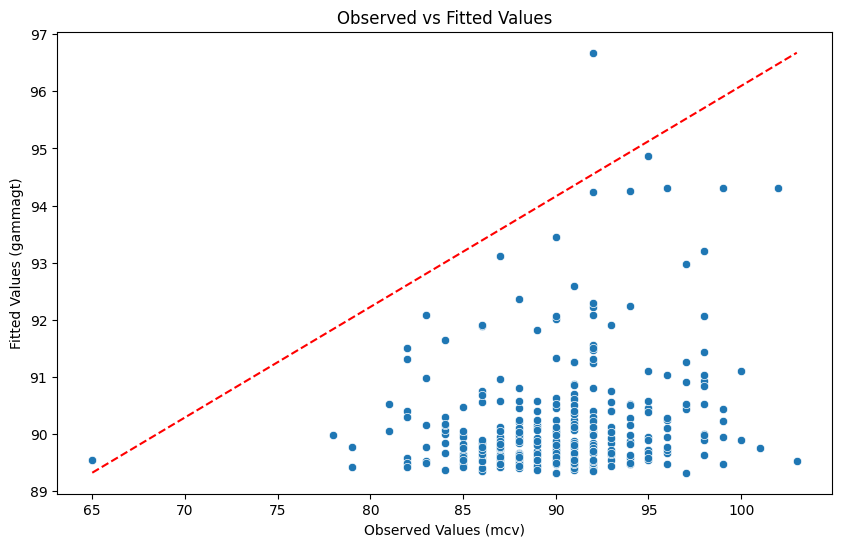

In [9]:
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['mcv'], y=fitted)
plt.xlabel('Observed Values (mcv)')
plt.ylabel('Fitted Values (gammagt)')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['mcv']), max(df['mcv'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [10]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9772670865058899, p-value=2.8928336178069003e-05


## Interpretation
### The p-value is extremely small (close to zero), well below common significance level 0.05. This suggests strong evidence against the null hypothesis that the data follows a normal distribution.

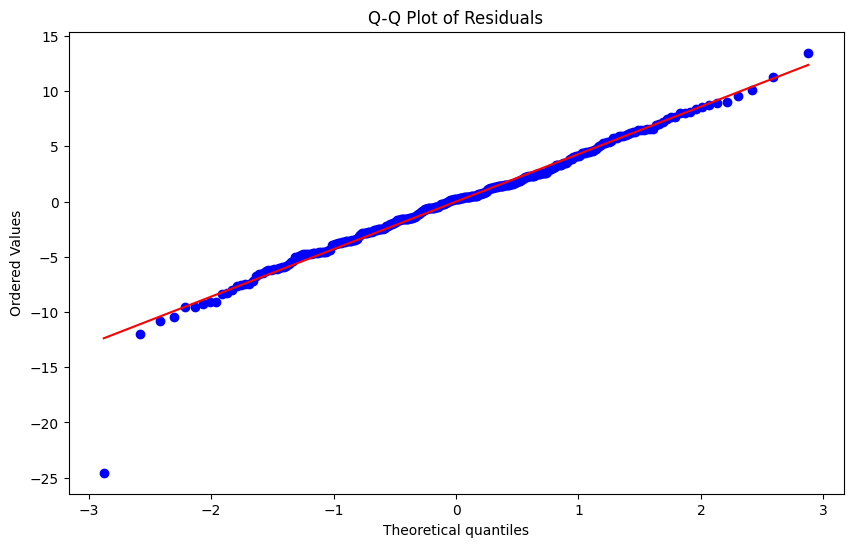

In [11]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [23]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.487251070890743, p-value=0.004941489685942742


## Interpretation
### The p-value associated with the F-statistic indicates the probability of observing the given test statistic (or more extreme) if the null hypothesis is true. A low p-value suggests rejecting the null hypothesis.

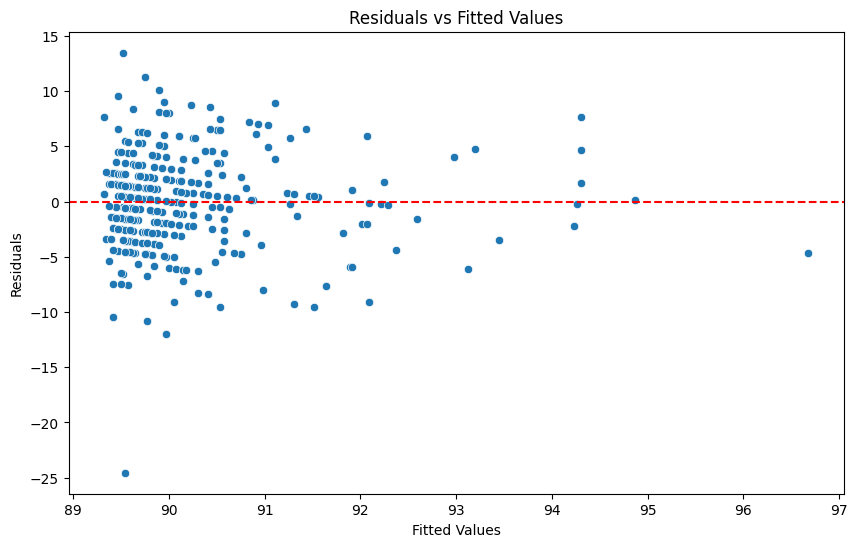

In [24]:
# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# 2. Multiple Linear Regression:
### Dependent variable: 'mcv'
### Independent variables:'alkphos', 'sgpt', 'sgot', 'gammagt'

In [13]:
X = df[['alkphos','sgpt','sgot','gammagt']]
X = sm.add_constant(X)
y = df['mcv']

#create and fit linear regression model
model = sm.OLS(y, X)
results2 = model.fit()

print(results2.summary())

residuals1 = results2.resid
fitted_1 = results2.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                    mcv   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     5.099
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000530
Time:                        00:03:46   Log-Likelihood:                -993.89
No. Observations:                 345   AIC:                             1998.
Df Residuals:                     340   BIC:                             2017.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.2362      1.036     85.206      0.0

## Interpretation
### The R-squareD Value 0.057 indicates that the model explains about 5.7% of the variance in the dependent variable

In [14]:
# Checking multicollinearity using VIF (Variance Inflation Factor)

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns #stores IV variables
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #calculates VIF of IV varaibles
print("\nVIF Data:")
print(vif_data)


VIF Data:
  Variable        VIF
0    const  19.590623
1  alkphos   1.030378
2     sgpt   2.307118
3     sgot   2.406096
4  gammagt   1.451094


## Interpretation
###  The VIF values indicate moderate to low levels of multicollinearity, suggesting that these variables do not share high correlations.

In [15]:
#Assessing linearity of the relationship
stat, p_value = linear_rainbow(results2)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.8937974080032186, p-value=0.7678284718076809


## Interpretation
### Given the p-value of 0.7678 suggests that there is no strong indication that the relationship between the dependent variable and the independent variables is significantly nonlinear.

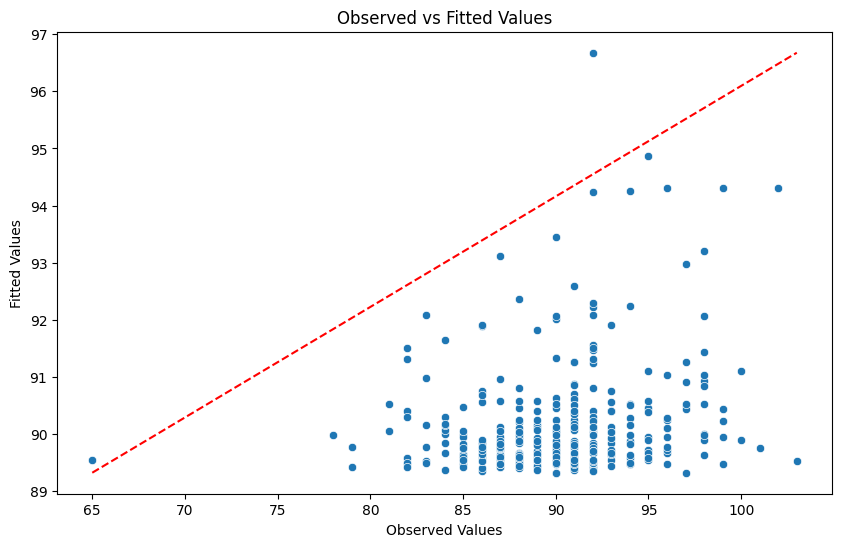

In [18]:
# Residuals vs Fitted Values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['mcv'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['mcv']), max(df['mcv'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [19]:
# Assessing normality of the residuals
W, p_value = shapiro(residuals1)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9776358008384705, p-value=3.406179166631773e-05


## Interpretation
### The W statistic of 0.9776 suggests that the data deviates somewhat from a perfectly normal distribution. Also, the small p-value (3.41e-05) indicates that you have enough evidence to reject the null hypothesis that the data is normally distributed.

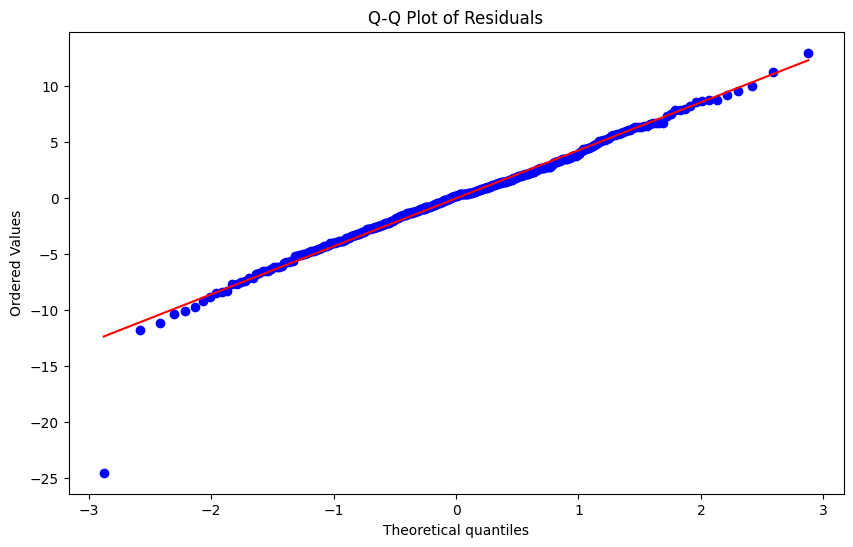

In [20]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals1, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [21]:
# Assessing Homogeneity
gq_test = het_goldfeldquandt(residuals1, results2.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.4557980087208726, p-value=0.007757092779957411


## Interpretation
### The p-value associated with the F-statistic is below the conventional significance level of 0.05. Therefore, you would reject the null hypothesis of equal variances.

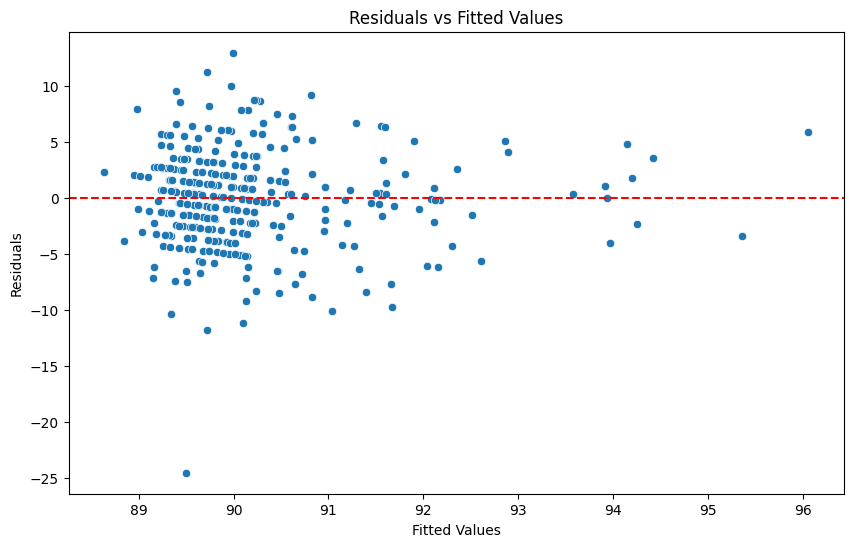

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_1, y=residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()